# EDA ANALYSIS OF STUDENT PERFORMACE DATASET

In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [93]:
df =pd.read_csv("C:/Users/naren/OneDrive/Desktop/EndToEnd/notebook/data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [95]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [96]:
print(f"gender have category: {df['gender'].unique()}")
print(f"race/ethnicity have category: {df['race/ethnicity'].unique()}")
print(f"parental level of education have category: {df['parental level of education'].unique()}")
print(f"lunch have category: {df['lunch'].unique()}")
print(f"test preparation course have category: {df['test preparation course'].unique()}")

gender have category: ['female' 'male']
race/ethnicity have category: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education have category: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch have category: ['standard' 'free/reduced']
test preparation course have category: ['none' 'completed']


In [97]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Seprating numerical and categorical data

In [98]:
numerical=[col for col in df.columns if (df[col].dtype == 'int64')]
print(f"numerical data: {numerical}")
categorical=[col for col in df.columns if col not in numerical]
print(f"categorical data: {categorical} ")

numerical data: ['math score', 'reading score', 'writing score']
categorical data: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


# Adding column of Total score and Average score

In [99]:
df["Total score"]= df["math score"]+df["reading score"]+df["writing score"]
df["Average score"]=df["Total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [100]:
math_full=df["math score"][df["math score"]==100].count()
reading_full=df["reading score"][df["reading score"]==100].count()
writing_full=df["writing score"][df["writing score"]==100].count()
print(f"full in maths: {math_full}")
print(f"full in reading: {reading_full}")
print(f"full in writing: {reading_full}")

full in maths: 7
full in reading: 17
full in writing: 17


In [101]:
math_less=df["math score"][df["math score"]<=20].count()
reading_less=df["reading score"][df["reading score"]<=20].count()
writing_less=df["writing score"][df["writing score"]<=20].count()
print(f"less than 20 in maths: {math_less}")
print(f"less than 20 in reading: {reading_less}")
print(f"less than 20 in writing: {reading_less}")

less than 20 in maths: 4
less than 20 in reading: 1
less than 20 in writing: 1


## Insight

### We come to know that maxmimum student performed well in reading and writing
### and student performed worst in maths 



# EDA using Visualisation

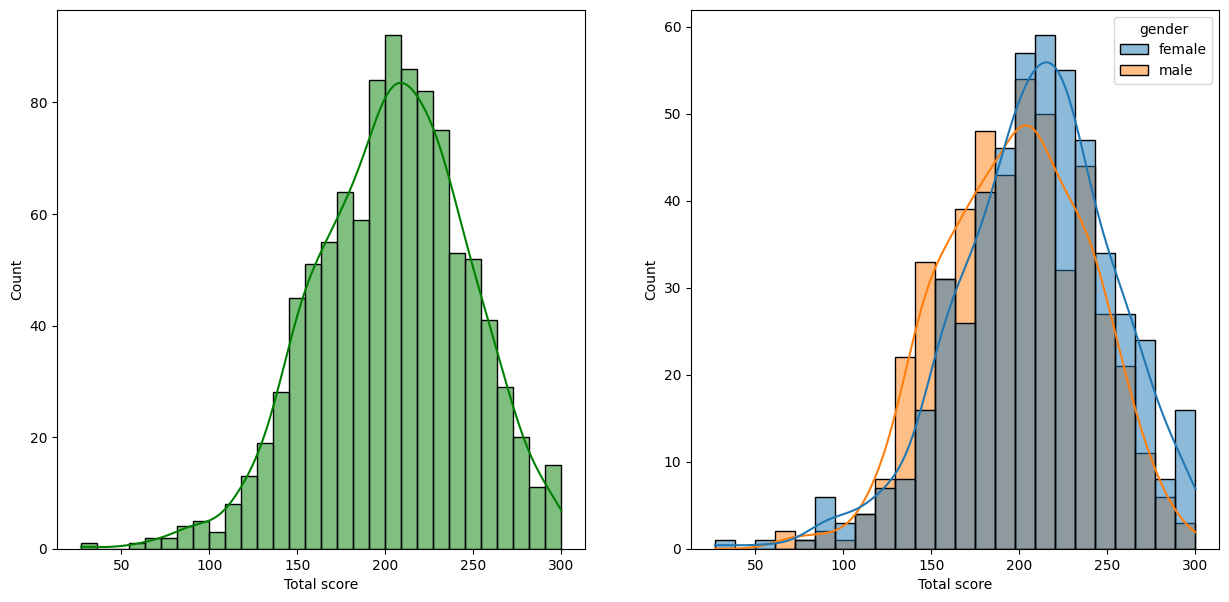

In [103]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()

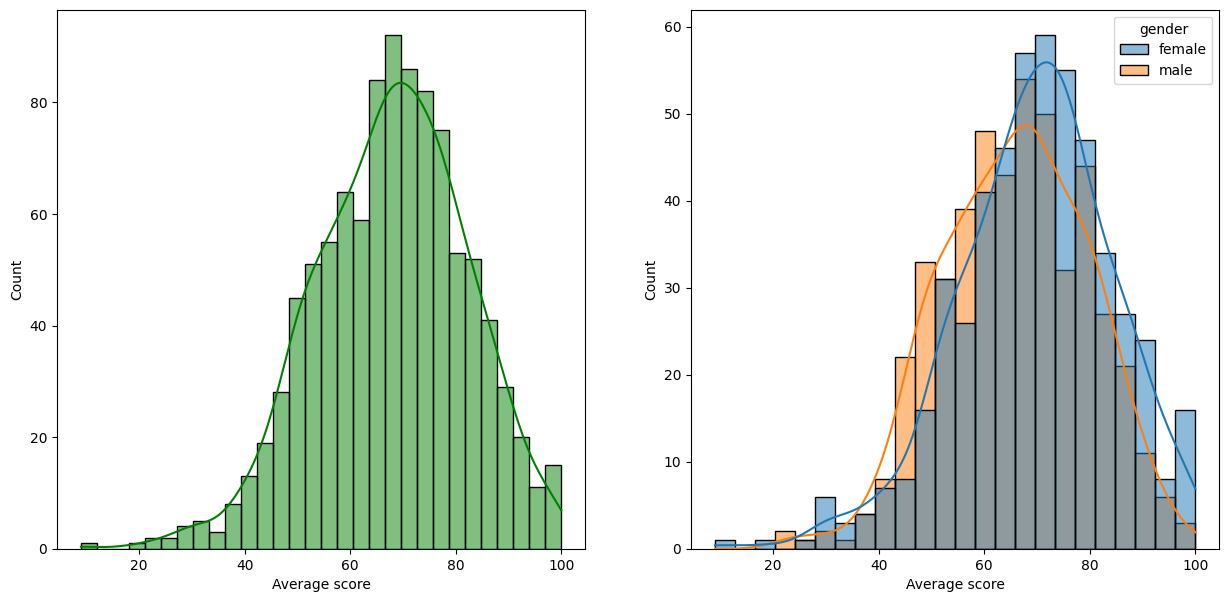

In [104]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

## Insight:
### As per total and average score female student performed well

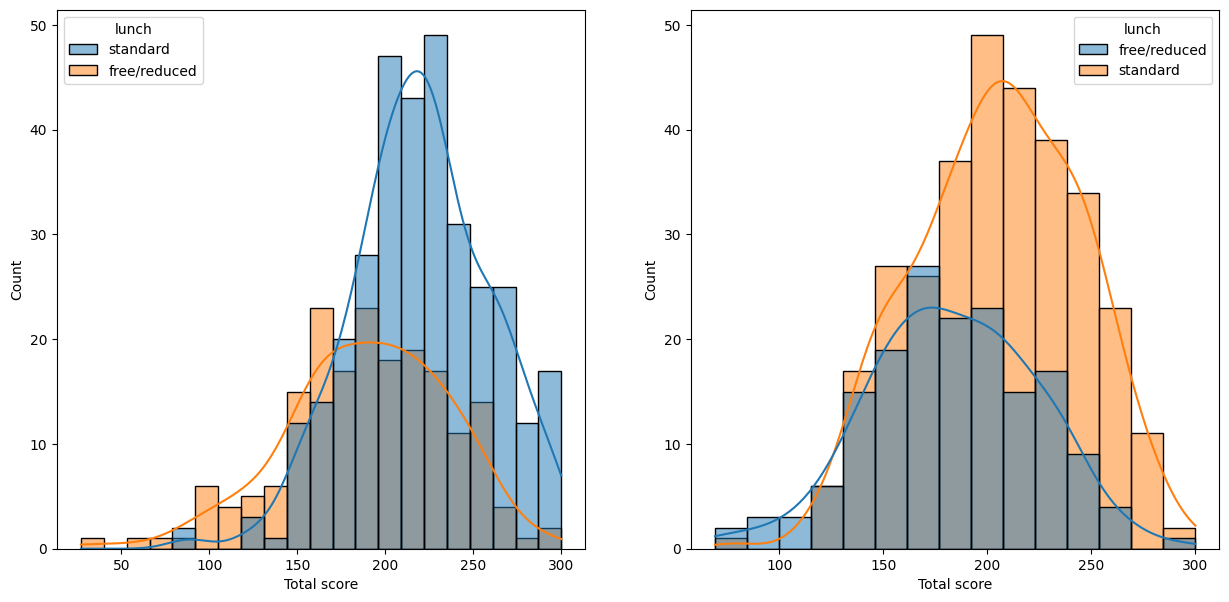

In [106]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df[df["gender"]=="female"],x='Total score',kde=True,hue='lunch')
plt.subplot(122)
sns.histplot(data=df[df["gender"]=="male"],x='Total score',kde=True,hue='lunch')
plt.show()

## Insight:

### standard lunch is more suitable for student to score well irrespective of Gender